In [93]:
# Importing modules
import numpy as np
from matplotlib import pyplot as plt
import os
import datetime
import timeit
import time
import pickle
from statistics import mean 
from os.path import dirname as up
print("ok")

# setting path to data
repo_path = os.getcwd()

# functions to use:
def round_done(repo_path):
    os.chdir(repo_path)
    print("done")

def plotting_saving(t,x,start_time,plt_num):
    add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
    print(add_the_time)
    plt.title(datetime.datetime.fromtimestamp(start_time).strftime('plt'+plt_num+' - ch?, bad documentation : %Y-%m-%d, at %H:%M:%S'))
    plt.xlabel('time [min]')
    plt.ylabel('[Volt]]')
    plt.scatter(t, x,s = 1)
    save_name = "fig_"+add_the_time+"_plt"+plt_num+"_min"
    plt.savefig(save_name ,bbox_inches='tight')
    plt.show()
    
def plotting_saving_ch(t,x,start_time,ch_num,ch_name):
    # change to saving-directory
    save_to_path = os.path.join(repo_path, "figs")
    os.chdir(save_to_path)
    #
    add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
    print(add_the_time)
    plt.title(datetime.datetime.fromtimestamp(start_time).strftime(ch_num+', '+ch_name+ ': %Y-%m-%d, at %H:%M:%S'))
    plt.xlabel('time [min]')
    plt.ylabel('[Volt]]')
    plt.scatter(t, x,s = 1)
    save_name = "fig_"+add_the_time+"_"+ch_num+"_min"
    plt.savefig(save_name ,bbox_inches='tight')
    plt.show()

def get_pickle_path(repo_path):
    two_up_path = up(up(repo_path))
    python_file_path = os.path.join(two_up_path, "Python")
    pickle_path = os.path.join(python_file_path, "Pickle_data") 
    return pickle_path    
# save_to_path = os.path.join(repo_path, "figs")
# os.chdir(save_to_path)

print("done")

# go back to original directory
os.chdir(repo_path)

# print( os.getcwd())
# # set path to get data
# pickle_path = get_pickle_path(repo_path)
# os.chdir(pickle_path)
# print( os.getcwd())
# round_done(repo_path)
# print( os.getcwd())

ok
done


In [102]:
# functions

def draw_fft(t_sec,x):
    N = len(x)
    dt = np.diff(t_sec)[2] #change this to an avg or mean at a later time.
    F_data = fft(x)
    F_frequency = np.linspace(0.0, 1.0/(2.0*dt), N//2)
#     plt.plot(F_frequency, 2.0/N * np.abs(F_data[0:N//2]))
    f_data = 2.0/N * np.abs(F_data[0:N//2])
#     plt.grid()
#     plt.show()
    return F_frequency, f_data

def open_from_pickle(file_name,ch1_plot_title='ch1', ch3_plot_title='ch3',ch4_plot_title='ch4'):
    # get data
    f = open(file_name,'rb')
    scope_data = pickle.load(f)
    # print(scope_data)
#     print(len(scope_data))
    start_time = scope_data[2]


    ch1_data = []
    ch1_time = []
    ch4_data = []
    ch4_time = []
    ch3_data = []
    ch3_time = []
#     print(start_time)
    add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
    print(add_the_time)

    with open(file_name, 'rb') as handle:
            try:
                while True:
                    temp_array = pickle.load(handle)
#                     print(len(temp_array))
    #                 print(temp_array[0])

                    data_time = temp_array[2]
                    time_diff = (data_time - start_time)/60
                    new_ch1_data = temp_array[3]
                    time_vec = temp_array[4]


                    ch1_t =[t+time_diff for t in time_vec] # [(data_time+t-start_time)/60 for t in time_vec]
                    ch1_data = ch1_data + new_ch1_data
                    ch1_time = ch1_time + ch1_t

                    new_ch3_data = temp_array[5]
                    ch3_time_vec = temp_array[6]
                    ch3_t =[t+time_diff for t in ch3_time_vec] # [data_time+t-start_time for t in ch3_time_vec]
                    ch3_data = ch3_data + new_ch3_data
                    ch3_time = ch3_time + ch3_t

                    new_ch4_data = temp_array[7]
                    ch4_time_vec = temp_array[8]
                    ch4_t =[t+time_diff for t in ch4_time_vec] # [data_time+t-start_time for t in ch4_time_vec]
                    ch4_data = ch4_data + new_ch4_data
                    ch4_time = ch4_time + ch4_t

            except EOFError:
                pass


    t = ch1_time
    x = ch1_data
    ch_num = ch1_plot_title
    ch_name = "amplified signal"
    
    plotting_ch(t,x,start_time,ch_num,ch_name)   

    t = ch4_time
    x = ch4_data
    ch_num = ch4_plot_title        
    ch_name = "non-amp-signal"
    plotting_ch(t,x,start_time,ch_num,ch_name)  

    t = ch3_time
    x = ch3_data
    ch_num = ch3_plot_title      
    ch_name = "sum"
    plotting_ch(t,x,start_time,ch_num,ch_name)  
    
    t1 = ch1_time
    t3= ch3_time
    t4= ch4_time
    x1= ch1_data
    x3= ch3_data
    x4= ch4_data
    return t1,x1,t3,x3,t4,x4,start_time
# ##################################################################################

def plotting_ch(t,x,start_time,ch_num,ch_name):
    # change to saving-directory
#     save_to_path = os.path.join(repo_path, "figs")
#     os.chdir(save_to_path)
    #
    add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
    print(add_the_time)
    plt.title(datetime.datetime.fromtimestamp(start_time).strftime(ch_num+', '+ch_name+ ': %Y-%m-%d, at %H:%M:%S'))
    plt.xlabel('[time [min]]')
    plt.ylabel('[Volt]]')
    plt.scatter(t, x,s = 1)
#     save_name = "fig_"+add_the_time+"_"+ch_num+"_min"
#     plt.savefig(save_name ,bbox_inches='tight')
    plt.show()
    
    
    
def plotting_saving_ch(t,x,start_time,ch_num,ch_name):
    # change to saving-directory
    save_to_path = os.path.join(repo_path, "figs")
    os.chdir(save_to_path)
    #
    add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
    print(add_the_time)
    plt.title(datetime.datetime.fromtimestamp(start_time).strftime(ch_num+', '+ch_name+ ': %Y-%m-%d, at %H:%M:%S'))
    plt.xlabel('[time [min]]')
    plt.ylabel('[Volt]]')
    plt.scatter(t, x,s = 1)
    save_name = "fig_"+add_the_time+"_"+ch_num+"_min"
    plt.savefig(save_name ,bbox_inches='tight')
    plt.show()

In [99]:
# print(repo_path)

# change to saving-directory
new_place = up(up(repo_path))
# print(new_place)
save_to_path = os.path.join(repo_path, "figs")
os.chdir(save_to_path)
save_figs = os.path.join(new_place, "Figures")
save_log_figs = os.path.join(save_figs , "Log_scale")


2
4
done
160662 15.08319


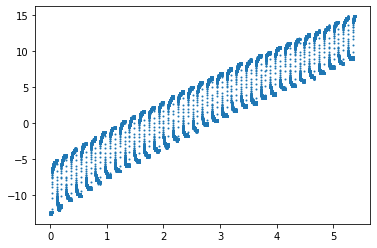

5.383537931074416 323.012275864465


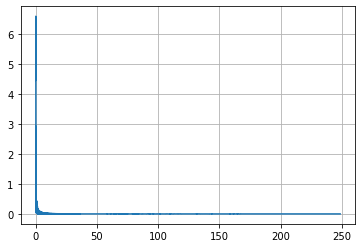

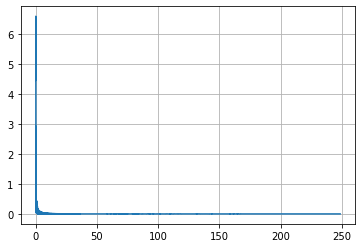

20200913_1601


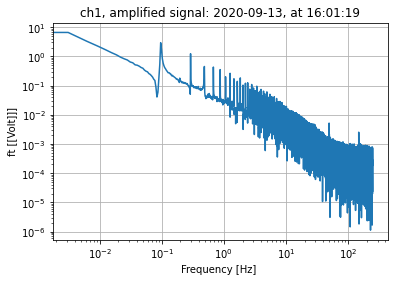

done


In [87]:
# 20200913_1601
time_stamps = []

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_200913n1600.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))

def plotting_saving_ch(t,x,start_time,ch_num,ch_name):
    # change to saving-directory
    save_to_path = os.path.join(repo_path, "figs")
    os.chdir(save_to_path)
    #
    add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
    print(add_the_time)
    plt.title(datetime.datetime.fromtimestamp(start_time).strftime(ch_num+', '+ch_name+ ': %Y-%m-%d, at %H:%M:%S'))
    plt.xlabel('time [min]')
    plt.ylabel('[Volt]]')
    plt.scatter(t, x,s = 1)
    save_name = "fig_"+add_the_time+"_"+ch_num+"_min"
    plt.savefig(save_name ,bbox_inches='tight')
    plt.show()

n = 0
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
                if len(temp_array) == 2:
                    start_time = temp_array[0][0]
                    t = temp_array[0][1:]
                    x = temp_array[1]
                    plt_num = n
                    ch_num = 'ch1'
                    ch_name ='amplified signal'
#                     plotting_saving_ch(t,x,start_time,ch_num,ch_name)
                    n=n+1
                    # set path to get data
                    pickle_path = get_pickle_path(repo_path)
                    os.chdir(pickle_path)
#                 else:
#                     start_time = temp_array[0][0]
#                     t1 = temp_array[0][1:]
#                     x1 = temp_array[1]
#                     t2 = temp_array[2][1:]
#                     x2 = temp_array[3]
#                     # change to saving-directory
#                     save_to_path = os.path.join(repo_path, "figs")
#                     os.chdir(save_to_path)
#                     plt_num = str(n+1)
#                     plotting_saving(t1,x1,start_time,plt_num)
#                     plt_num = str(n+2)
#                     plotting_saving(t2,x2,start_time,plt_num)
#                     n = n+2
#                     # set path to get data
                    pickle_path = get_pickle_path(repo_path)
                    os.chdir(pickle_path)
        except EOFError:
            pass
        
round_done(repo_path)

idx = x.index(max(x))
print(x.index(max(x)),max(x))
plt.scatter(t[:idx], x[:idx],s = 1)
plt.show()

%matplotlib inline
# %matplotlib
import numpy as np
from scipy.fft import fft

t_vec = t[:idx]
t_vec_s = ([var*60 for var in t_vec]) #t vec in [seconds]
data_vec = x[:idx]

N = len(data_vec)
# N = Number of points

# sample spacing
dt = np.diff(t_vec_s)[0]
sample_rate = 1/dt

F_data = fft(data_vec)
F_frequency = np.linspace(0.0, 1.0/(2.0*dt), N//2)
print(t_vec[-1],t_vec_s[-1])

plt.plot(F_frequency, 2.0/N * np.abs(F_data[0:N//2]))
plt.grid()
plt.show()

def draw_fft(t_sec,x):
    N = len(x)
    dt = np.diff(t_sec)[2] #change this to an avg or mean at a later time.
    F_data = fft(x)
    F_frequency = np.linspace(0.0, 1.0/(2.0*dt), N//2)
    plt.plot(F_frequency, 2.0/N * np.abs(F_data[0:N//2]))
    f_data = 2.0/N * np.abs(F_data[0:N//2])
#     plt.grid()
#     plt.show()
    return F_frequency, f_data


# t [sec],    x[Volts]
ft,fx = draw_fft(t_vec_s,data_vec)

# change to saving-directory
os.chdir(save_log_figs)

#
the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
print(the_time)
plt.title(datetime.datetime.fromtimestamp(start_time).strftime(ch_num+', '+ch_name+ ': %Y-%m-%d, at %H:%M:%S'))

plt.xlabel('Frequency [Hz] ')
plt.ylabel('ft [[Volt]]]')
# plt.scatter(t, x,s = 1)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.plot(ft, fx)
save_name = "fig_log_Frequency_oscillating_"+the_time+"_"+ch_num+"_amplified_signal"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()
    
# plt.yscale('log')
# plt.xscale('log')
# plt.plot(ft, fx)
# plt.grid()
# plt.show()

# here = 500
# plt.plot(ft[:here], fx[:here])
# plt.grid()
# plt.show()

# plt.yscale('log')
# plt.xscale('log')
# plt.plot(ft[:here], fx[:here])
# plt.grid()
# plt.show()
round_done(repo_path)

20201012_1508
20201012_1508


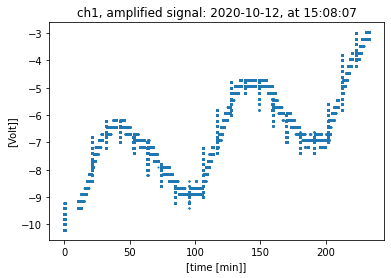

20201012_1508


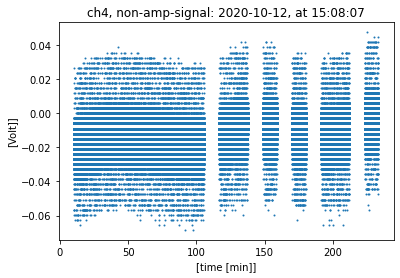

20201012_1508


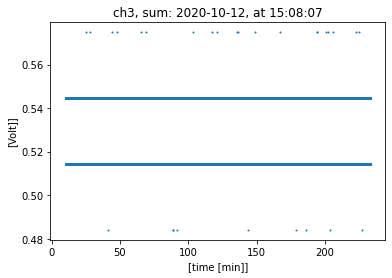

done
points_per_sec :  399.6935005512551
done


In [111]:
# 20201012_1508

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

file_name = "data_20201012_1507.pickle"
t1 ,x1,t3,x3,t4,x4,start_time = open_from_pickle(file_name)
# t_vec_s = ([var*60 for var in t1]) #t vec in [seconds]
# data_vec = x
# ft,fx = draw_fft(t_vec_s,data_vec)
# here = 500
# plt.plot(ft[:here], fx[:here])
# plt.grid()
# plt.show()

round_done(repo_path)


points_per_sec = len(x1)/(t1[-1]*60)
print("points_per_sec : " ,points_per_sec)
new_x = []
new_t = []
for i in range(len(x)-len(x)%100):
    avg_150 = np.mean(x1[i:i+150])
    time_150 = np.mean(t1[i:i+150])
    new_x.append(avg_150)
    new_t.append(time_150)
    i = i+150
print("done")

20201012_1508


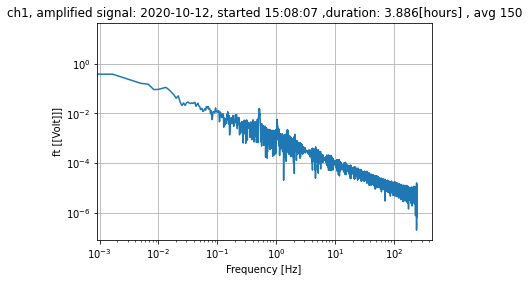

In [112]:
# t_vec_s = ([var*60 for var in t1]) #t vec in [seconds]
# data_vec = x1
# ft,fx = draw_fft(t_vec_s,data_vec)
# here = 3
# # plt.plot(t1,x1)
# # plt.show()
# plt.plot(ft[:here], fx[:here])
# plt.grid()
# plt.show()


# change to saving-directory
os.chdir(save_log_figs)

t_vec_s = ([var*60 for var in new_t]) #t vec in [seconds]    
plt.yscale('log')
plt.xscale('log')
ft,fx = draw_fft(t_vec_s,new_x)

the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
print(the_time)
hours = str(t1[-1]/60)
hours = "%.3f"%(t1[-1]/60)
plt.title(datetime.datetime.fromtimestamp(start_time).strftime(ch_num+', '+ch_name+ ': %Y-%m-%d, started %H:%M:%S ,duration: '+hours+'[hours] , avg 150'))

plt.xlabel('Frequency [Hz] ')
plt.ylabel('ft [[Volt]]]')
# plt.scatter(t, x,s = 1)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.plot(ft, fx)
save_name = "fig_log_Frequency_"+the_time+"_"+ch_num+"_amplified_signal_avg_150"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()

20201012_1508


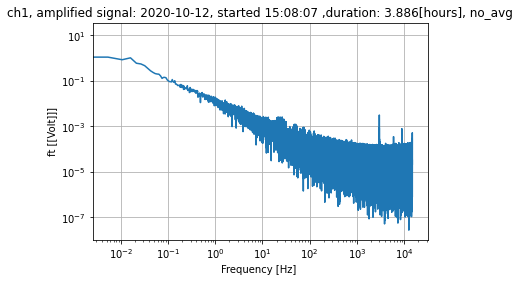

In [113]:
ft,fx = draw_fft(t1,x1)
# plt.yscale('log')
# plt.xscale('log')
# plt.grid()
# plt.plot(ft, fx)
# plt.show()
the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
print(the_time)
hours = str(t1[-1]/60)
hours = "%.3f"%(t1[-1]/60)
plt.title(datetime.datetime.fromtimestamp(start_time).strftime(ch_num+', '+ch_name+ ': %Y-%m-%d, started %H:%M:%S ,duration: '+hours+'[hours], no_avg'))

plt.xlabel('Frequency [Hz] ')
plt.ylabel('ft [[Volt]]]')
# plt.scatter(t, x,s = 1)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.plot(ft, fx)
save_name = "fig_log_Frequency_"+the_time+"_"+ch_num+"_amplified_signal_no_avg"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()

20201012_2334
20201012_2334


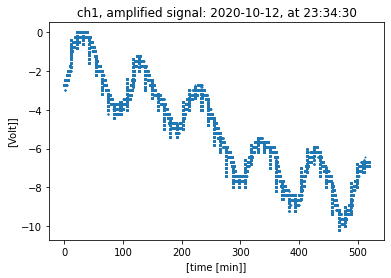

20201012_2334


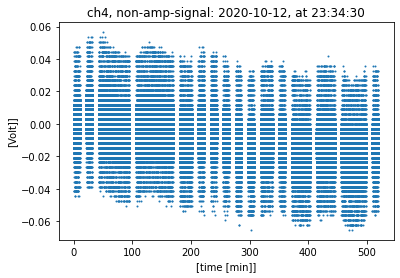

20201012_2334


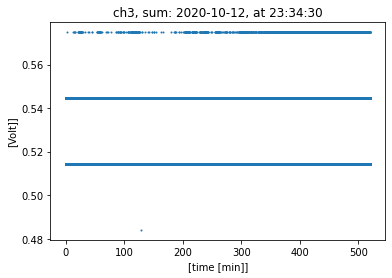

done
points_per_sec :  421.8967809183839
done
20201012_2334


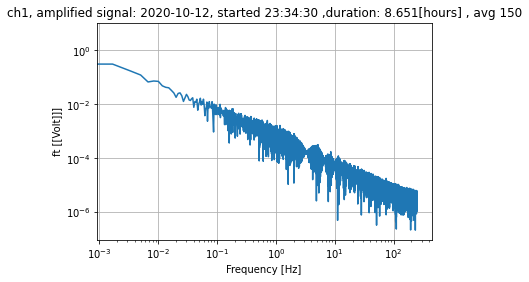

20201012_2334


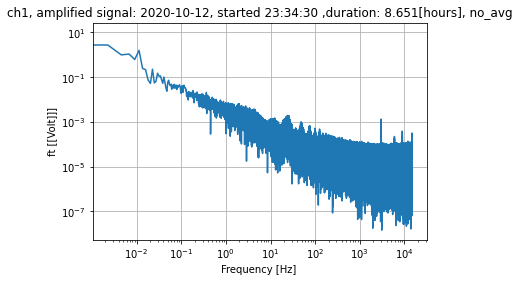

In [114]:
# 20201012_2334


# 'data_20201012_2333.pickle'

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

file_name = "data_20201012_2333.pickle"
t1 ,x1,t3,x3,t4,x4,start_time = open_from_pickle(file_name)

round_done(repo_path)


points_per_sec = len(x1)/(t1[-1]*60)
print("points_per_sec : " ,points_per_sec)
new_x = []
new_t = []
for i in range(len(x)-len(x)%100):
    avg_150 = np.mean(x1[i:i+150])
    time_150 = np.mean(t1[i:i+150])
    new_x.append(avg_150)
    new_t.append(time_150)
    i = i+150
print("done")

# change to saving-directory
os.chdir(save_log_figs)

t_vec_s = ([var*60 for var in new_t]) #t vec in [seconds]    
plt.yscale('log')
plt.xscale('log')
ft,fx = draw_fft(t_vec_s,new_x)

the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
print(the_time)
hours = str(t1[-1]/60)
hours = "%.3f"%(t1[-1]/60)
plt.title(datetime.datetime.fromtimestamp(start_time).strftime(ch_num+', '+ch_name+ ': %Y-%m-%d, started %H:%M:%S ,duration: '+hours+'[hours] , avg 150'))

plt.xlabel('Frequency [Hz] ')
plt.ylabel('ft [[Volt]]]')
# plt.scatter(t, x,s = 1)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.plot(ft, fx)
save_name = "fig_log_Frequency_"+the_time+"_"+ch_num+"_amplified_signal_avg_150"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()

ft,fx = draw_fft(t1,x1)
the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
print(the_time)
hours = str(t1[-1]/60)
hours = "%.3f"%(t1[-1]/60)
plt.title(datetime.datetime.fromtimestamp(start_time).strftime(ch_num+', '+ch_name+ ': %Y-%m-%d, started %H:%M:%S ,duration: '+hours+'[hours], no_avg'))

plt.xlabel('Frequency [Hz] ')
plt.ylabel('ft [[Volt]]]')
# plt.scatter(t, x,s = 1)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.plot(ft, fx)
save_name = "fig_log_Frequency_"+the_time+"_"+ch_num+"_amplified_signal_no_avg"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()